# CS4035 - Cyber Data Analytics
## Lab 1 - Fraud data

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 1 contains 5 main questions, including the bonus. Write the code or explanation below each sub question. For the explanations, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) The libraries needed to run this file. Except for numpy, scikit-learn, pandas, matplotlib

Your peers should be able to use the readme section for instructions and be able to run this file. 

Make sure to keep your answers concise. Maximum number of words is 1000, which you can count with the code below. (You can add around 600 words since we start at around 400).

In [166]:
# If this cell does not work try running `pip install nbformat`

import io
from IPython import nbformat

nb = nbformat.read("Lab1-2021.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 374


/home/raphael/.local/lib/python3.6/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


## Group Number :

## Student 1 
### Name : Yuan Tian
### ID :

## Student 2
### Name : Raphael Frühwirth
### ID : 5897297

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

## 1. Visualization task – 1 A4

### 1a. Plot visulations 

FileNotFoundError: [Errno 2] No such file or directory: 'figures/figure_accountcode.png'

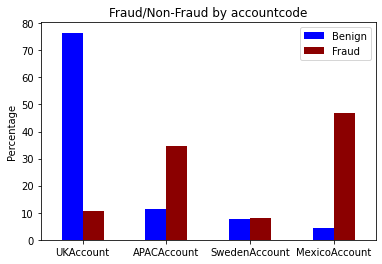

In [167]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv("cda-lab-1-credit-card-fraud/train_data.csv")

index = "accountcode"
top = 5
transactions = df[index].value_counts()[:top]
frauds = df.groupby(index)['label'].sum()

df['label'] = df['label'].replace({0: 1, 1: 0})
benign = df.groupby(index)['label'].sum()

frauds = (100. * frauds / frauds.sum()).round(1)
transactions = (100. * transactions / transactions.sum()).round(1)
benign = (100. * benign/benign.sum()).round(1)

df_viz = pd.DataFrame({"Benign": benign, "Fraud": frauds}, index=df[index].unique()[:top])
ax = df_viz.plot.bar(rot=0, color=["blue", "darkred"])
plt.ylabel("Percentage")
plt.title(f"Fraud/Non-Fraud by {index}")
plt.savefig(f"figures/figure_{index}.png", transparent=False, format="png", facecolor="white")


<AxesSubplot:title={'center':'Class Distribution'}, xlabel='label'>

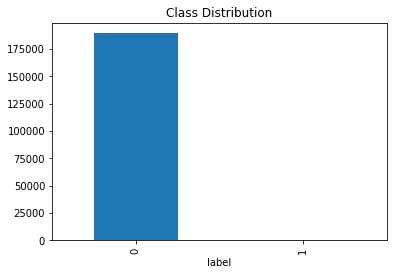

In [ ]:
import pandas as pd 

train_data = pd.read_csv("cda-lab-1-credit-card-fraud/train_data.csv")
test_data = pd.read_csv("cda-lab-1-credit-card-fraud/test_data.csv")

#create pivot table to visualize the class distribution
train_data_pivot = pd.pivot_table(train_data, index="label", aggfunc="size")
train_data_pivot.plot(kind="bar", title="Class Distribution")


Index(['MX', 'AU', 'GB', 'SE', 'NZ', 'FI'], dtype='object', name='issuercountrycode')


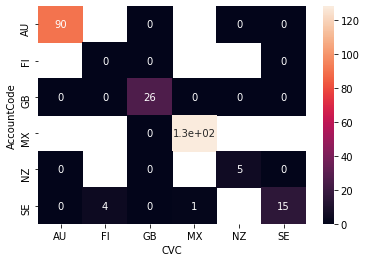

In [ ]:
import seaborn as sns

df = pd.read_csv("cda-lab-1-credit-card-fraud/train_data.csv")
top = 6

# df.loc[df['label'] == 0, 'label'] = 2  
# df.loc[df['label'] == 1, 'label'] = 0
# df.loc[df['label'] == 0, 'label'] = 1

popular_countries = df.groupby("issuercountrycode")["label"].sum().sort_values(ascending=False)
print(popular_countries[:top].index)

df_filtered = df[(df["issuercountrycode"].isin(popular_countries[:top].index) & df["shoppercountrycode"].isin(popular_countries[:top].index))]

x = df_filtered["issuercountrycode"]
y = df_filtered["shoppercountrycode"]
label = df_filtered["label"]

df_new = pd.DataFrame({'AccountCode': y, 'CVC': x, 'Score':label})

df_heatmap = df_new.pivot_table(values='Score', index='AccountCode', columns='CVC', aggfunc=sum)
sns.heatmap(df_heatmap, annot=True)
plt.show()


In [ ]:
import pandas as pd

def process_df(df):
  exchange_rates = {
        'USD': 1.0,
        'GBP': 1.42,
        'AUD': 0.73,
        'SEK': 0.12,
        'MXN': 0.049,
        'NZD': 0.65
        }

  def normalize_amount(row):
      currency_code = row['currencycode']
      amount = row['amount']
      exchange_rate = exchange_rates[currency_code]
      return amount * exchange_rate

  df['amount'] = df.apply(normalize_amount, axis=1)
  df['accountcode'] = df['accountcode'].astype('category').cat.codes
  df['txvariantcode'] = df['txvariantcode'].astype('category').cat.codes
  df['issuercountrycode'] = df['issuercountrycode'].astype('category').cat.codes
  df['currencycode'] = df['currencycode'].astype('category').cat.codes
  df['shoppercountrycode'] = df['shoppercountrycode'].astype('category').cat.codes
  df['shopperinteraction'] = df['shopperinteraction'].astype('category').cat.codes
  df['cardverificationcodesupplied'] = df['cardverificationcodesupplied'].astype('category').cat.codes

  df['mail_id'] = df['mail_id'].astype('category').cat.codes
  df['ip_id'] = df['ip_id'].astype('category').cat.codes
  df['card_id'] = df['card_id'].astype('category').cat.codes

  df.to_csv("cda-lab-1-credit-card-fraud/processed.csv", index=False)
  
  return df

<AxesSubplot:>

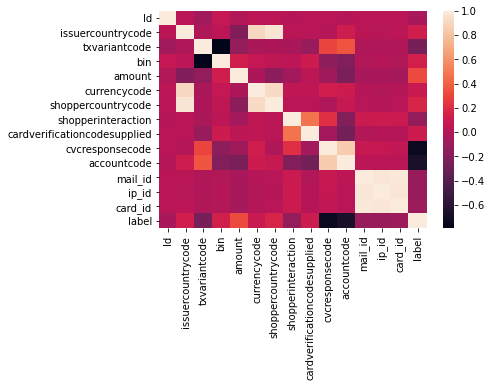

In [169]:
df = pd.read_csv("cda-lab-1-credit-card-fraud/train_data.csv")

df = process_df(df)
num = len(df[df["label"]==1])
non_fraud = df[df["label"] == 0].sample(num, random_state=12)
fraud = df[df["label"] == 1].sample(num, random_state=12)

non_fraud["card_id"].replace(non_fraud["card_id"].unique(), range(len(non_fraud["card_id"].unique())),inplace=True)
non_fraud["ip_id"].replace(non_fraud["ip_id"].unique(), range(len(non_fraud["ip_id"].unique())),inplace=True)
non_fraud["mail_id"].replace(non_fraud["mail_id"].unique(), range(len(non_fraud["mail_id"].unique())),inplace=True)

fraud["card_id"].replace(fraud["card_id"].unique(), range(len(fraud["card_id"].unique())),inplace=True)
fraud["ip_id"].replace(fraud["ip_id"].unique(), range(len(fraud["ip_id"].unique())),inplace=True)
fraud["mail_id"].replace(fraud["mail_id"].unique(), range(len(fraud["mail_id"].unique())),inplace=True)

corr_mat = pd.concat([non_fraud, fraud]).corr()
sns.heatmap(corr_mat)


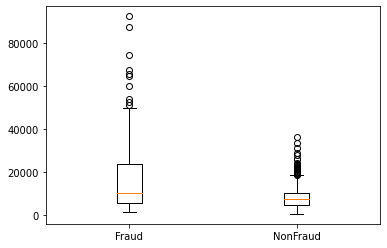

In [170]:
feature = "amount"
dic = {"Fraud": fraud[feature], "NonFraud": non_fraud[feature]}
plt.boxplot(dic.values())
plt.xticks(range(1, len(dic.keys())+1), dic.keys())
plt.show()

### 1b. Describe the visualizations and provide relavant explanations of features and relations.

## 2. Imbalance task – 1 A4 – Individual

### 2a. Print ROC curves

In [171]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
def smote(df, k=3):
    #features = ["cvcresponsecode", "accountcode", "issuercountrycode", "amount", "txvariantcode"]

    minority_class = df[df["label"] == 1]
    smoted_points = []
    knn = NearestNeighbors(n_neighbors=k).fit(minority_class.drop("label", axis=1))
    i = 0
    while(len(smoted_points) < (len(df) - len(minority_class))):
        if i == len(minority_class):
            i = 0
        distances, indices  = knn.kneighbors(minority_class.drop("label", axis=1).iloc[i].values.reshape(1, -1), return_distance=True)
        indices = indices[0][1:]
        rand_index = np.random.choice(indices)
        neighbor_row = minority_class.iloc[rand_index]
        current_row = minority_class.iloc[i]

        v = neighbor_row - current_row
        new_row = current_row + np.random.uniform(0, 1) * v

        # row = minority_class.iloc[i].copy()
        # row.update(new_row[features])

        smoted_points.append(new_row)

        i += 1
        #print("Curr:", current_row)
        #print("Neig:", neighbor_row)
        #print("V:", v)
        #print("NewRow:", new_row)
        #print("------")

    new_df = pd.DataFrame(smoted_points)
    concatenated_df = pd.concat([new_df, minority_class], axis=0)
    print(len(smoted_points))

    # 1  features = ["bin", "accountcode", "shoppercountrycode", "label"]
    # 2  features = ["bin", "accountcode", "cvcresponsecode"] 
    with open("cda-lab-1-credit-card-fraud/synthetic_train_full_with_ids.csv", "w") as f:
        new_df = pd.concat([concatenated_df, df])
        new_df = new_df.sample(frac=1)
        new_df.to_csv(f, index=False)
    return new_df


In [175]:
train_data = process_df(pd.read_csv("cda-lab-1-credit-card-fraud/train_data.csv")).drop(["mail_id", "ip_id", "card_id"], axis=1)
test_data = process_df(pd.read_csv("cda-lab-1-credit-card-fraud/test_data.csv")).drop(["mail_id", "ip_id", "card_id"], axis=1)

# train_data = process_df(pd.read_csv("cda-lab-1-credit-card-fraud/train_data.csv"))
# test_data = process_df(pd.read_csv("cda-lab-1-credit-card-fraud/test_data.csv"))

In [176]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
def scale(df, standardization=False):
    if standardization:
        scaler = StandardScaler()
    else:
        scaler = MinMaxScaler((0, 1))
    c = df.columns
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df,columns = c)
    return df

train_data_nonscaled = train_data.copy()
train_data = scale(train_data.drop("label", axis=1), standardization=True)
#train_data = scale(train_data)
train_data["label"]  = train_data_nonscaled["label"]
# nonscaled_test = test_data.copy()
# test_data = scale(test_data, standardization=True)


In [177]:
import random

def get_random_index(current_index, n_swapped_df, p):
    left = max(0, current_index - int(p* n_swapped_df))
    right = min(n_swapped_df-1, current_index + int(p*n_swapped_df))

    random_index = random.randint(left,right)
    return random_index

# independently swapping
def rank_swapping(swapped_df, features):
    p = 0.1
    swapped_df.reset_index(drop=True, inplace=True)
    new_df = swapped_df.copy()
    for feature in features:
        sorted_df = swapped_df.sort_values(feature).reset_index()
        for i, row in swapped_df.iterrows():
            try:
                current_index = sorted_df.index[sorted_df[feature]==swapped_df.iloc[i][feature]].tolist()[0]
            except:
                print(i, feature, len(sorted_df), len(swapped_df))
            random_index = get_random_index(current_index,len(swapped_df), p)
            new_df.loc[i, feature] = sorted_df.iloc[random_index][feature]

    return new_df

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report    
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

columns = ["issuercountrycode", "txvariantcode"]
#["issuercountrycode","txvariantcode","bin","amount","currencycode","shoppercountrycode","shopperinteraction","cardverificationcodesupplied","cvcresponsecode","accountcode"]
train_data = train_data.drop(columns=columns)
train, test = train_test_split(train_data, test_size=0.2, stratify=train_data["label"], random_state=12)

def test_model(classifier=LogisticRegression(), with_smote=False, use_test=False):
    if with_smote:
        print("Testing Model with SMOTEd data")
        # X_resampled, y_resampled = SMOTE(k_neighbors=5).fit_resample(train.drop(["label"], axis=1), train["label"])
        #smoted_data = smote(train_data)
        smoted_data = pd.read_csv("cda-lab-1-credit-card-fraud/synthetic_train_full.csv").drop(columns=columns)
        smote_no_scale = smoted_data.copy()
        smoted_data = scale(smoted_data, standardization=True)
        smoted_data = scale(smoted_data)
        smoted_data["label"] = smote_no_scale["label"]
        smote_model = classifier

        if use_test:
            smote_model.fit(smoted_data.drop("label", axis=1), smoted_data["label"])
            predictions = smote_model.predict(test_data)
            pred_proba = smote_model.predict_proba(test_data)
            return predictions, pred_proba
        
        smote_model.fit(smoted_data.drop("label", axis=1), smoted_data["label"])
        predictions = smote_model.predict(test.drop("label", axis=1))
        pred_proba = smote_model.predict_proba(test.drop("label", axis=1))

    else:
        print("Testing Model with regular data")
        model = classifier
        model.fit(train.drop("label", axis=1), train["label"])
        predictions = model.predict(test.drop("label", axis=1))
        pred_proba = model.predict_proba(test.drop("label", axis=1))



    tn, fp, fn, tp = confusion_matrix(test['label'], predictions).ravel()
    print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)
    print(classification_report(test["label"], predictions, zero_division=0))
    return predictions, pred_proba

In [179]:
def plot_roc_curve(y_test, y_pred):
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt

    #plot roc curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

Testing Model with regular data
True negatives:  37868 
False positives:  3 
False negatives:  55 
True Positives:  0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37871
           1       0.00      0.00      0.00        55

    accuracy                           1.00     37926
   macro avg       0.50      0.50      0.50     37926
weighted avg       1.00      1.00      1.00     37926



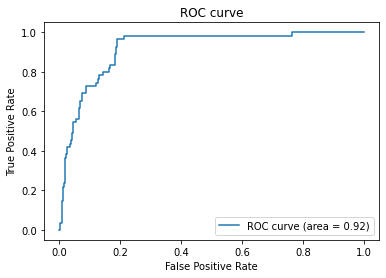

,Id,bin,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,accountcode,label
count,151702.000000,151702.000000,151702.000000,151702.000000,151702.000000,151702.000000,151702.000000,151702.000000,151702.000000,151702.000000
mean,0.000059,-0.000458,-0.000130,-0.001428,-0.000837,-0.001087,-0.000298,-0.001193,-0.000651,0.001457
std,0.999786,0.999864,1.001061,0.998399,0.999715,1.002313,1.000253,1.001335,1.000902,0.038140
min,-1.730219,-2.369063,-1.102358,-1.306769,-1.957819,-5.642158,-3.845835,-2.065065,-2.458120,0.000000
25%,-0.866583,-0.560958,-0.522692,-0.235831,-0.210574,0.159932,0.294003,0.467378,0.502867,0.000000
50%,-0.000114,-0.277072,-0.158867,-0.235831,-0.210574,0.159932,0.294003,0.467378,0.502867,0.000000
75%,0.868597,0.935538,0.210587,-0.235831,-0.210574,0.159932,0.294003,0.467378,0.502867,0.000000
max,1.731072,2.076989,48.763023,2.976982,3.098039,5.962021,0.294003,10.597148,0.502867,1.000000


In [180]:
predictions, probabilities = test_model()
plot_roc_curve(test["label"], probabilities[:,1])
train.describe()


Testing Model with SMOTEd data
True negatives:  24668 
False positives:  13203 
False negatives:  11 
True Positives:  44
              precision    recall  f1-score   support

           0       1.00      0.65      0.79     37871
           1       0.00      0.80      0.01        55

    accuracy                           0.65     37926
   macro avg       0.50      0.73      0.40     37926
weighted avg       1.00      0.65      0.79     37926



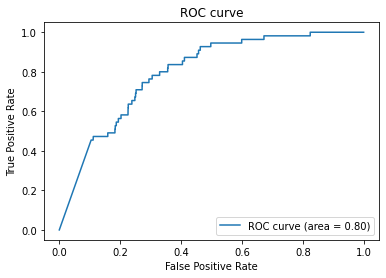

In [182]:
predictions, probabilities = test_model(with_smote=True)
plot_roc_curve(test["label"], probabilities[:,1])

Testing Model with regular data
True negatives:  37869 
False positives:  2 
False negatives:  55 
True Positives:  0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37871
           1       0.00      0.00      0.00        55

    accuracy                           1.00     37926
   macro avg       0.50      0.50      0.50     37926
weighted avg       1.00      1.00      1.00     37926



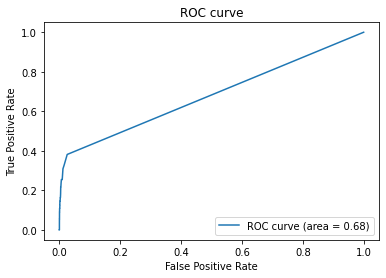

In [ ]:
predictions, probabilities = test_model(classifier=RandomForestClassifier() ,with_smote=False)
plot_roc_curve(test["label"], probabilities[:, 1])

Testing Model with SMOTEd data
True negatives:  37869 
False positives:  2 
False negatives:  55 
True Positives:  0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37871
           1       0.00      0.00      0.00        55

    accuracy                           1.00     37926
   macro avg       0.50      0.50      0.50     37926
weighted avg       1.00      1.00      1.00     37926



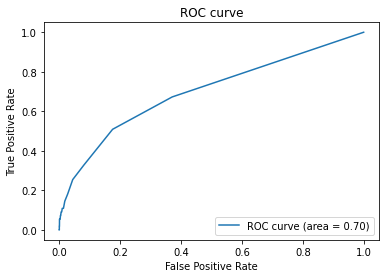

In [ ]:
predictions, probabilities = test_model(classifier=RandomForestClassifier(), with_smote=True)
plot_roc_curve(test["label"], probabilities[:, 1])

Testing Model with regular data
True negatives:  37861 
False positives:  10 
False negatives:  55 
True Positives:  0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37871
           1       0.00      0.00      0.00        55

    accuracy                           1.00     37926
   macro avg       0.50      0.50      0.50     37926
weighted avg       1.00      1.00      1.00     37926



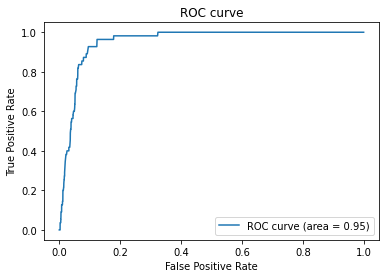

In [ ]:
predictions, probabilities = test_model(classifier=AdaBoostClassifier(), with_smote=False)
plot_roc_curve(test["label"], probabilities[:, 1])

Testing Model with SMOTEd data
True negatives:  37078 
False positives:  793 
False negatives:  50 
True Positives:  5
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     37871
           1       0.01      0.09      0.01        55

    accuracy                           0.98     37926
   macro avg       0.50      0.53      0.50     37926
weighted avg       1.00      0.98      0.99     37926



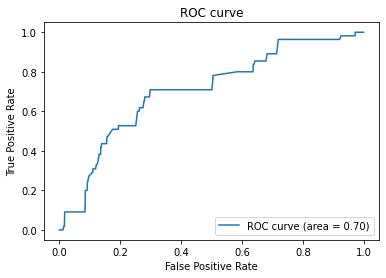

In [ ]:
predictions, probabilities = test_model(classifier=AdaBoostClassifier(), with_smote=True, use_test=False)
plot_roc_curve(test["label"], probabilities[:, 1])

# predictions = pd.DataFrame(predictions, columns=["Predicted"])
# print(len(test_data), len(predictions))


# predictions["Id"] = nonscaled_test["Id"]
# predictions["Predicted"] = predictions["Predicted"].astype(float)
# predictions = predictions[["Id", "Predicted"]]

# predictions.to_csv("cda-lab-1-credit-card-fraud/submission.csv", index=False)
# predictions.head()

Testing Model with regular data
True negatives:  56806 
False positives:  0 
False negatives:  83 
True Positives:  0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56806
           1       0.00      0.00      0.00        83

    accuracy                           1.00     56889
   macro avg       0.50      0.50      0.50     56889
weighted avg       1.00      1.00      1.00     56889



/home/raphael/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/raphael/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/raphael/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


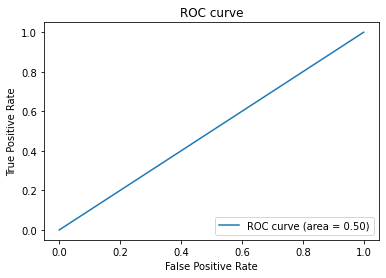

In [ ]:
predictions = test_model(classifier=MLPClassifier(), with_smote=False)
plot_roc_curve(test["label"], predictions)

Testing Model with SMOTEd data
True negatives:  52496 
False positives:  4310 
False negatives:  18 
True Positives:  65
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56806
           1       0.01      0.78      0.03        83

    accuracy                           0.92     56889
   macro avg       0.51      0.85      0.49     56889
weighted avg       1.00      0.92      0.96     56889



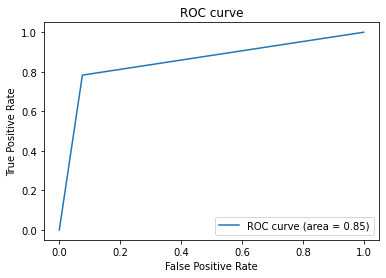

In [ ]:
predictions = test_model(classifier=MLPClassifier(), with_smote=True)
plot_roc_curve(test["label"], predictions)

### 2b. Analyse the performance of the classifiers. Explain which method performs best.

### 2c. Is using SMOTE a good idea? Why (not)?

## 3. Privacy task – 1 A4 – Individual

### 3a. Print ROC curves

### 3b. Analyse the performance of the classifiers. Explain which method performs best.

### 3c. Can you explain the performance difference for the different classifiers? Is it advisable to protect people’s privacy using rank-swapping? Why (not)?

## 4. Classification task – 2 A4

### 4a. Print relevant plots and metrics with clear headings.

### 4b. Explain the applied data pre-processing steps, learning algorithms, and post-processing steps or ensemble methods. Compare the performance of the two algorithms, focusing on performance criteria that are relevant in practice, use 10-fold cross-validation.

## 5. Bonus task – 1 A4

### 5a. Provide code and report below